<a href="https://colab.research.google.com/github/anny1892/Sales_prediction/blob/main/Sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,MinMaxScaler,StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Train.csv to Train.csv


In [3]:
df=pd.read_csv('Train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df.Item_Weight.mean()

12.857645184135976

In [7]:
df.Item_Weight=df.Item_Weight.fillna(df.Item_Weight.mean())

In [8]:
df.Item_Weight.isna().sum()

0

In [9]:
df.Item_Weight

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [10]:
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [11]:
df.Outlet_Size.mode()

0    Medium
dtype: object

In [12]:
df.Outlet_Size.fillna(df.Outlet_Size.mode()[0],inplace=True)
df.Outlet_Size.isna().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [15]:
df.Item_Identifier.value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [16]:
label=LabelEncoder()
df.Item_Identifier=label.fit_transform(df.Item_Identifier)

In [17]:
df.Item_Identifier.value_counts()

1077    10
413     10
1542     9
301      9
35       9
        ..
1200     1
819      1
713      1
46       1
251      1
Name: Item_Identifier, Length: 1559, dtype: int64

In [18]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [19]:
df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [20]:
df['Item_Fat_Content'].replace({'Low Fat':0,'Regular':1},inplace=True)
df.Item_Fat_Content.value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [21]:
df.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [22]:
df['Item_Type']=label.fit_transform(df['Item_Type'])
df['Item_Type'].value_counts()

6     1232
13    1200
9      910
5      856
4      682
3      649
0      648
8      520
14     445
10     425
1      251
7      214
11     169
15     148
2      110
12      64
Name: Item_Type, dtype: int64

In [23]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [24]:
df['Outlet_Identifier']=label.fit_transform(df['Outlet_Identifier'])
df['Outlet_Identifier'].value_counts()

5    935
1    932
9    930
8    930
6    930
7    929
3    928
2    926
0    555
4    528
Name: Outlet_Identifier, dtype: int64

In [25]:
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [26]:
df['Outlet_Size'].replace({'Small':0,'Medium':1,'High':2},inplace=True)
df['Outlet_Size'].value_counts()

1    5203
0    2388
2     932
Name: Outlet_Size, dtype: int64

In [27]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [28]:
df['Outlet_Location_Type'].replace({'Tier 1':0,'Tier 2':1,'Tier 3':2},inplace=True)
df['Outlet_Location_Type'].value_counts()

2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64

In [29]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [30]:
df['Outlet_Type']=label.fit_transform(df['Outlet_Type'])
df['Outlet_Type'].value_counts()

1    5577
0    1083
3     935
2     928
Name: Outlet_Type, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 799.2 KB


In [32]:
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.114660,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,-0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.007975,-0.008301,0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.114660,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.000764,0.003151,0.000622,-0.001598,0.002199,0.018719
Item_Visibility,-0.025482,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,-0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,-0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,-0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,-0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,-0.001389,0.007225,0.000622,-0.069309,0.001859,-0.006059,-0.504603,-0.193389,1.000000,0.614311,0.201483,0.086182
Outlet_Location_Type,0.003656,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,0.614311,1.000000,0.467219,0.089367


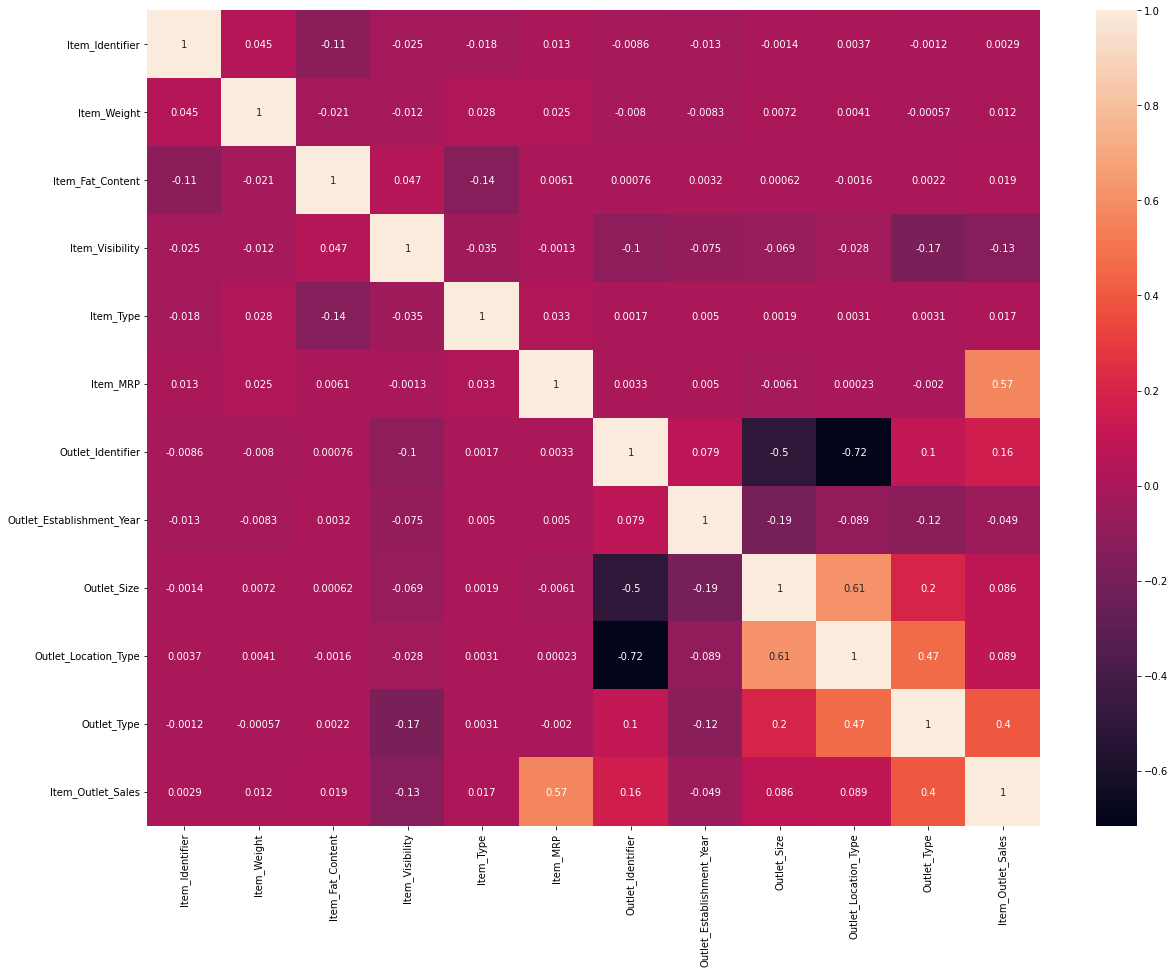

In [33]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Train Test Split

In [34]:
x=df.drop('Item_Outlet_Sales',axis=1)
y=df.Item_Outlet_Sales

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

## 1. Linear Regression

In [36]:
lin=LinearRegression()
lin.fit(x_train,y_train)

LinearRegression()

In [37]:
# Training data evaluation

y_pred=lin.predict(x_train)

mse=mean_squared_error(y_train,y_pred)
print('MSE:',mse)
mae=mean_absolute_error(y_train,y_pred)
print('MAE:',mae)
rmse=np.sqrt(mse)
print('RMSE:',rmse)
r2score=r2_score(y_train,y_pred)
print('R squared value:',r2score)

MSE: 1429686.9083702522
MAE: 899.1040214045253
RMSE: 1195.6951569569278
R squared value: 0.5065726676927501


In [38]:
# Testing data evaluation

y_pred_test=lin.predict(x_test)

mse=mean_squared_error(y_test,y_pred_test)
print('MSE:',mse)
mae=mean_absolute_error(y_test,y_pred_test)
print('MAE:',mae)
rmse=np.sqrt(mse)
print('RMSE:',rmse)
r2score=r2_score(y_test,y_pred_test)
print('R squared value:',r2score)

MSE: 1411183.582975189
MAE: 888.6472741502695
RMSE: 1187.932482498559
R squared value: 0.5245997931746152


## 2. KNN

In [39]:
knn=KNeighborsRegressor()

### Scaling

In [40]:
std=StandardScaler()
x_train_scale=std.fit_transform(x_train)
x_test_scale=std.transform(x_test)

In [41]:
knn.fit(x_train_scale,y_train)

KNeighborsRegressor()

In [42]:
# Training data evaluation

y_pred=knn.predict(x_train_scale)

mse=mean_squared_error(y_train,y_pred)
print('MSE:',mse)
mae=mean_absolute_error(y_train,y_pred)
print('MAE:',mae)
rmse=np.sqrt(mse)
print('RMSE:',rmse)
r2score=r2_score(y_train,y_pred)
print('R squared value:',r2score)

MSE: 935824.0616136154
MAE: 684.0850476210032
RMSE: 967.3799985598293
R squared value: 0.6770193756916201


In [43]:
# Testing data evaluation

y_pred_test=knn.predict(x_test_scale)

mse=mean_squared_error(y_test,y_pred_test)
print('MSE:',mse)
mae=mean_absolute_error(y_test,y_pred_test)
print('MAE:',mae)
rmse=np.sqrt(mse)
print('RMSE:',rmse)
r2score=r2_score(y_test,y_pred_test)
print('R squared value:',r2score)

MSE: 1438299.74645064
MAE: 848.7873786041056
RMSE: 1199.2913517784743
R squared value: 0.5154648869299137


## 3. Decision Tree

In [44]:
dt=DecisionTreeRegressor(random_state=30)
dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=30)

In [45]:
# Training data evaluation

y_pred=dt.predict(x_train)

mse=mean_squared_error(y_train,y_pred)
print('MSE:',mse)
mae=mean_absolute_error(y_train,y_pred)
print('MAE:',mae)
rmse=np.sqrt(mse)
print('RMSE:',rmse)
r2score=r2_score(y_train,y_pred)
print('R squared value:',r2score)

MSE: 0.0
MAE: 0.0
RMSE: 0.0
R squared value: 1.0


In [46]:
# Testing data evaluation

y_pred_test=dt.predict(x_test)

mse=mean_squared_error(y_test,y_pred_test)
print('MSE:',mse)
mae=mean_absolute_error(y_test,y_pred_test)
print('MAE:',mae)
rmse=np.sqrt(mse)
print('RMSE:',rmse)
r2score=r2_score(y_test,y_pred_test)
print('R squared value:',r2score)

MSE: 2528628.207607083
MAE: 1126.9873592961878
RMSE: 1590.1660943458337
R squared value: 0.14815450846833977


## Hyperparameter Tunning

In [47]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
dt=DecisionTreeRegressor(random_state=30)
hyp={'criterion':['mse','mae'],'max_depth':np.arange(2,8),'min_samples_split':np.arange(2,20),
     'min_samples_leaf':np.arange(2,15)}
gscv=GridSearchCV(dt,hyp,cv=5)
gscv.fit(x_train,y_train)
gscv.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=5, min_samples_leaf=14,
                      random_state=30)

In [50]:
dct=DecisionTreeRegressor(criterion='mse', max_depth=5, min_samples_leaf=14,
                      random_state=30)
dct.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, min_samples_leaf=14,
                      random_state=30)

In [51]:
# Training data evaluation

y_pred=dct.predict(x_train)

mse=mean_squared_error(y_train,y_pred)
print('MSE:',mse)
mae=mean_absolute_error(y_train,y_pred)
print('MAE:',mae)
rmse=np.sqrt(mse)
print('RMSE:',rmse)
r2score=r2_score(y_train,y_pred)
print('R squared value:',r2score)

MSE: 1152490.2881315656
MAE: 750.9458545913519
RMSE: 1073.5410044015857
R squared value: 0.6022414382803447


In [52]:
# Testing data evaluation

y_pred_test=dct.predict(x_test)

mse=mean_squared_error(y_test,y_pred_test)
print('MSE:',mse)
mae=mean_absolute_error(y_test,y_pred_test)
print('MAE:',mae)
rmse=np.sqrt(mse)
print('RMSE:',rmse)
r2score=r2_score(y_test,y_pred_test)
print('R squared value:',r2score)

MSE: 1213999.28245518
MAE: 774.9168425279382
RMSE: 1101.8163560481303
R squared value: 0.5910273355446141


## Random Forest 

In [53]:
rf=RandomForestRegressor(random_state=30)
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=30)

In [54]:
# Training data evaluation

y_pred=rf.predict(x_train)

mse=mean_squared_error(y_train,y_pred)
print('MSE:',mse)
mae=mean_absolute_error(y_train,y_pred)
print('MAE:',mae)
rmse=np.sqrt(mse)
print('RMSE:',rmse)
r2score=r2_score(y_train,y_pred)
print('R squared value:',r2score)

MSE: 181464.92420889105
MAE: 294.95439105866825
RMSE: 425.9870000468219
R squared value: 0.9373710754882691


In [55]:
# Testing data evaluation

y_pred_test=rf.predict(x_test)

mse=mean_squared_error(y_test,y_pred_test)
print('MSE:',mse)
mae=mean_absolute_error(y_test,y_pred_test)
print('MAE:',mae)
rmse=np.sqrt(mse)
print('RMSE:',rmse)
r2score=r2_score(y_test,y_pred_test)
print('R squared value:',r2score)

MSE: 1281870.8995190277
MAE: 797.4395939589442
RMSE: 1132.1973765731077
R squared value: 0.5681627124162044
